# EE 232 E Project 3 RL & IRL

# Part I RL

## Question 1 - 9

In [1]:
import numpy as np
from cvxopt import solvers, matrix

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)


import util
import pickle
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


C:\Users\kgicmd\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
reward1 = np.zeros((10,10))
reward1[9,9] = 1

reward2 = np.zeros((10,10))
reward2[1:7,4] = -100
reward2[3:8,8] = -100
reward2[1,5] = -100
reward2[1:4,6] = -100
reward2[7:9,6] = -100
reward2[3,7] = -100
reward2[7,7] = -100
reward2[9,9] = 10

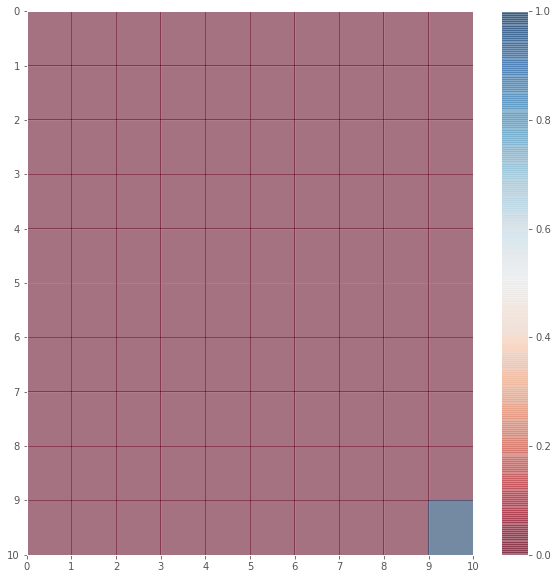

In [3]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward1, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

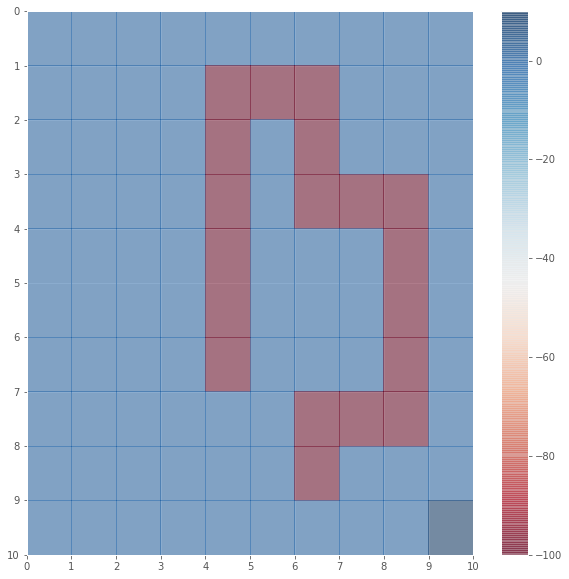

In [4]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward2, cmap = "RdBu", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

In [5]:
mdp_process = util.MDP()
mdp_process.reward = reward1
#mdp_process.delta = 1e10 # should be a very large number
mdp_process.epsilon = 0.01
mdp_process.gamma = 0.8
mdp_process.w = 0.1

mdp_process.update()

10
delta = 0.12052571187470829
20
delta = 0.01200068146059638


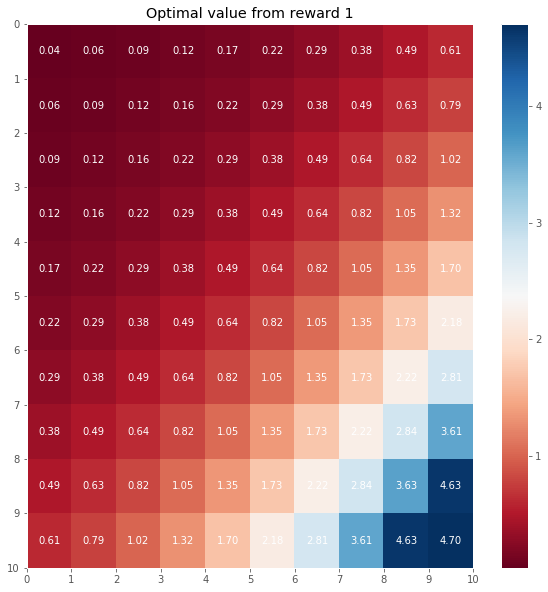

In [6]:
mdp_process.plot_value("Optimal value from reward 1")

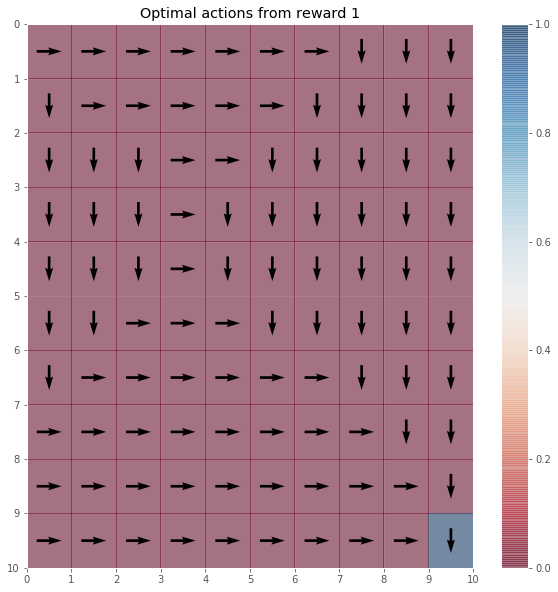

In [7]:
mdp_process.plot_action("Optimal actions from reward 1")

In [8]:
mdp_process2 = util.MDP()
mdp_process2.reward = reward2
#mdp_process2.delta = 1e10 # should be a very large number
mdp_process2.epsilon = 0.01
mdp_process2.gamma = 0.8
mdp_process2.w = 0.1

mdp_process2.update()

10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434


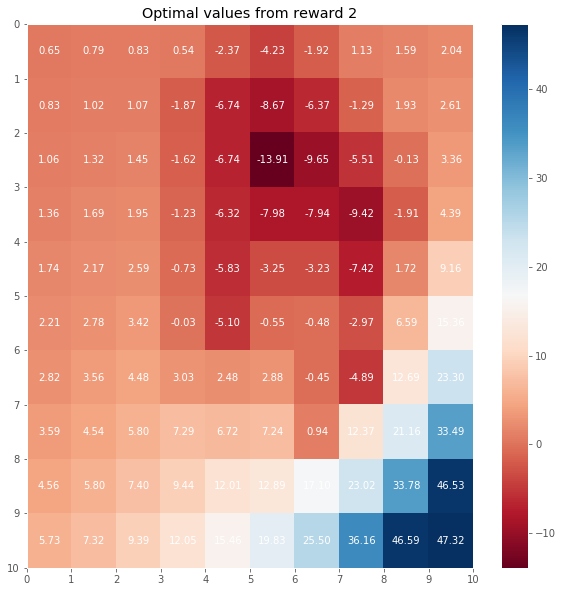

In [9]:
mdp_process2.plot_value("Optimal values from reward 2")

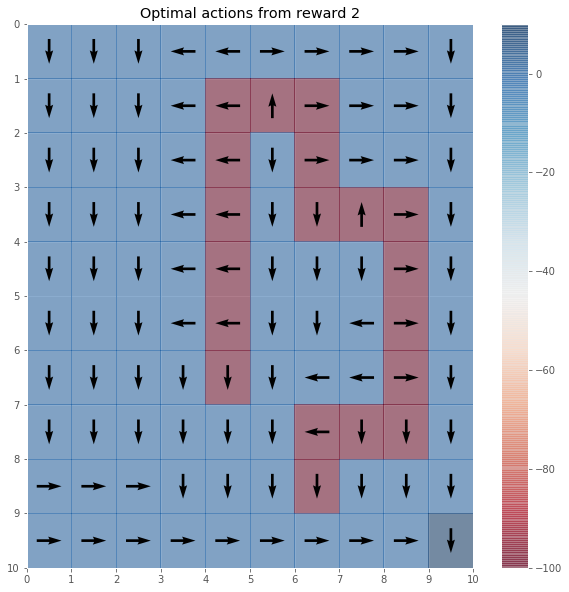

In [10]:
mdp_process2.plot_action("Optimal actions from reward 2")

# Part 2 IRL

In [11]:
def acc_calc(expert_action, new_action, lambda_range):
    acc = []
    for i in range(len(lambda_range)):
        accuracy = 0
        for j in range(10):
            for k in range(10):
                if expert_action[j][k] == new_action[i][j][k]:
                    accuracy += 1
        accuracy /= 100
        acc.append(accuracy)
        print('lambda = ' + str(lambda_range[i]) + ':  ' + str(accuracy))
    return acc

In [ ]:
lambda_range = np.linspace(0, 5, 500)
r_1, r_2 = util.initial_reward_map()

action_dict = {0:'right', 1:'up', 2:'left', 3:'down'}
action_list = ['right','up','left','down']

for r_idx, rfunc in enumerate([r_1, r_2]):
    mdp_process = util.return_new_mdp(rfunc)
    action_data1 = mdp_process.action
    print (action_data1)

    process = []
    new_action = []
    M = util.construct_matrix_constant(mdp_process)

    for idx, coeffi_lambda in enumerate(lambda_range):
        print('Now is doing: ' + str(idx))
        c,D,b = util.get_c_D_b(coeffi_lambda, M, rfunc)
        calculated_reward = util.get_reward(c,D,b)
        new_reward_map = util.create_reward_map(calculated_reward)
        new_mdp = util.return_new_mdp(new_reward_map)
        process.append(new_mdp)
        new_action.append(new_mdp.action)
        #print (new_mdp.action)

    acc = acc_calc(action_data1, new_action, lambda_range)
    cwd = os.getcwd()
    with open(cwd + '\\lambda.pk', 'wb') as f:
        pickle.dump(lambda_range, f)
    with open (cwd + '\\acc_' + str(r_idx)+'.pk', 'wb') as f:
        pickle.dump(acc,f)

## Quesition 12

(0.79158316633266534, 0.98)


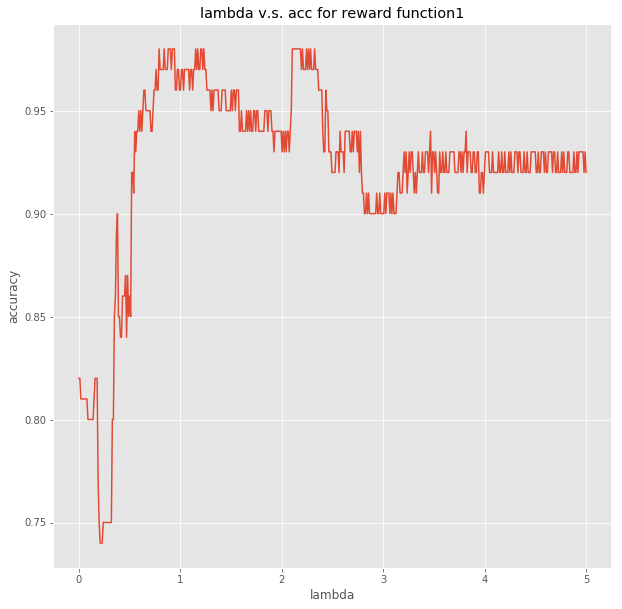

In [13]:
cwd = os.getcwd()

with open (cwd + '\\lambda.pk', 'rb') as f:
    lamb = pickle.load(f)
with open (cwd + '\\acc_0.pk', 'rb') as f:
    acc = pickle.load(f)

#print(acc)
idx = np.argmax(acc)
best_lamb = lamb[idx]
print((best_lamb, acc[idx]))
util.plot_curve(lamb, acc, 'lambda v.s. acc for reward function1')

## Question 13

10
delta = 0.12052571187470829
20
delta = 0.01200068146059638


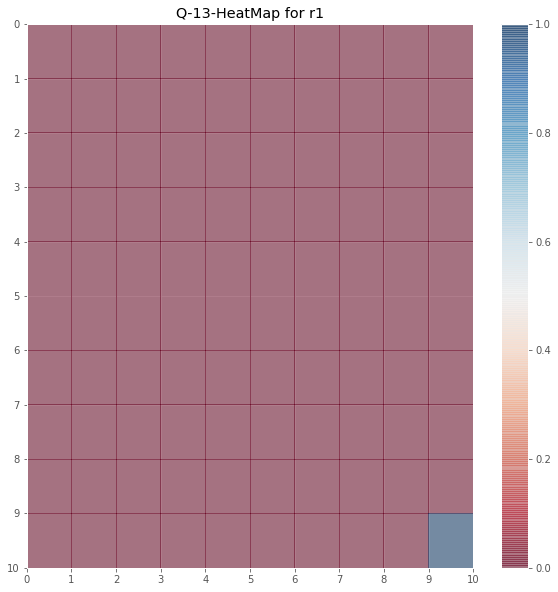

In [14]:
r_1, r_2 = util.initial_reward_map()
rfunc = r_1
mdp_process = util.return_new_mdp(rfunc)
util.plot_heat_map(r_1, "Q-13-HeatMap for r1")

10
delta = 0.16225461020616283
20
delta = 0.007465482928190215


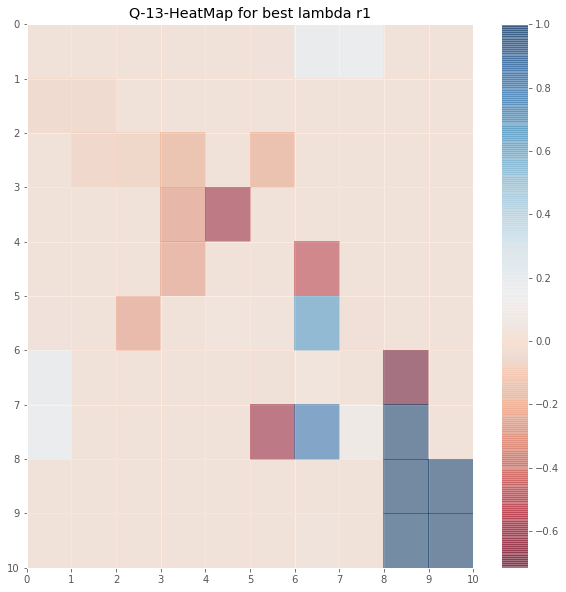

In [15]:
M = util.construct_matrix_constant(mdp_process)
c, D, b = util.get_c_D_b(best_lamb, M, rfunc)
calculated_reward = util.get_reward(c, D, b)
new_reward_map = util.create_reward_map(calculated_reward)
new_mdp = util.return_new_mdp(new_reward_map)
#print (new_reward_map)
util.plot_heat_map(new_reward_map, "Q-13-HeatMap for best lambda r1")

## Question 14

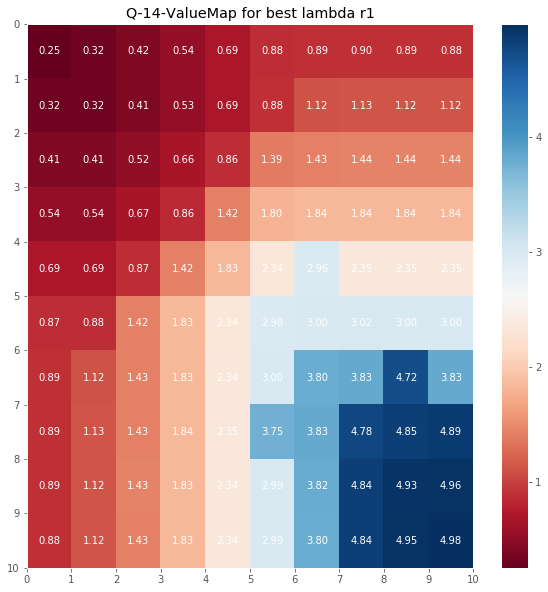

In [16]:
new_mdp.plot_value("Q-14-ValueMap for best lambda r1", text_reveal=True, decimal = 2)

## Question 15

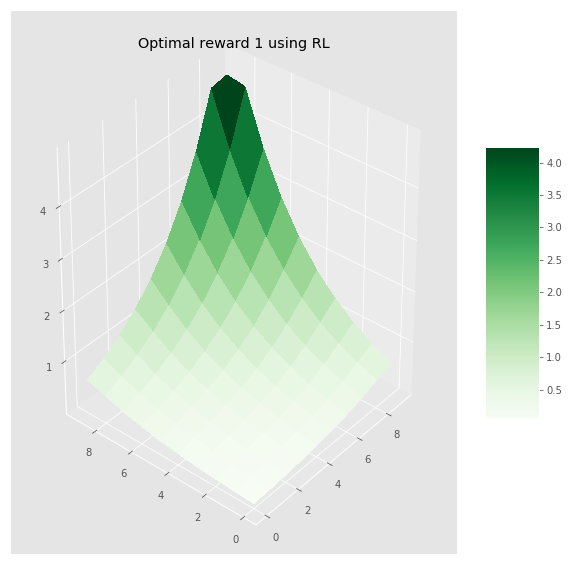

In [17]:
zlim = [0,0]
zlim[0] = np.min([np.min(mdp_process.V),np.min(new_mdp.V)])
zlim[1] = np.max([np.max(mdp_process.V),np.max(new_mdp.V)])
util.plot_mesh(mdp_process.V,"Optimal reward 1 using RL",zlim)

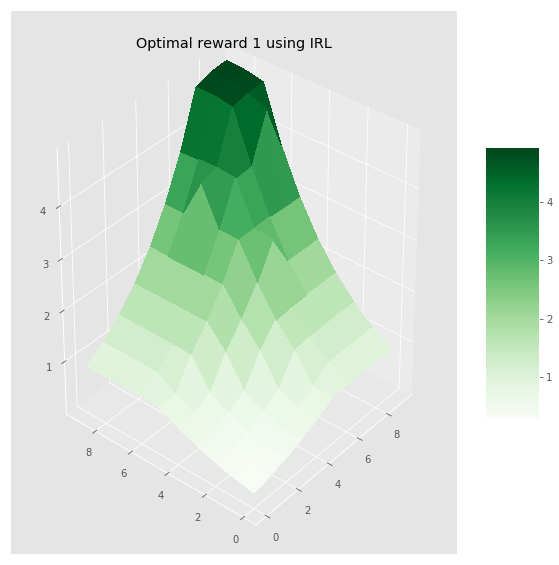

In [18]:
util.plot_mesh(new_mdp.V,"Optimal reward 1 using IRL",zlim)

## Question 16

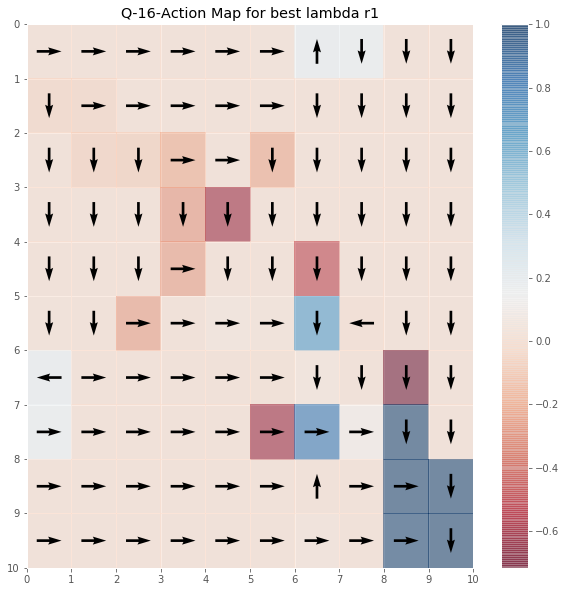

In [19]:
new_mdp.plot_action("Q-16-Action Map for best lambda r1")

## Question 17

In [20]:
pass

## Question 18

(1.3226452905811623, 0.94)


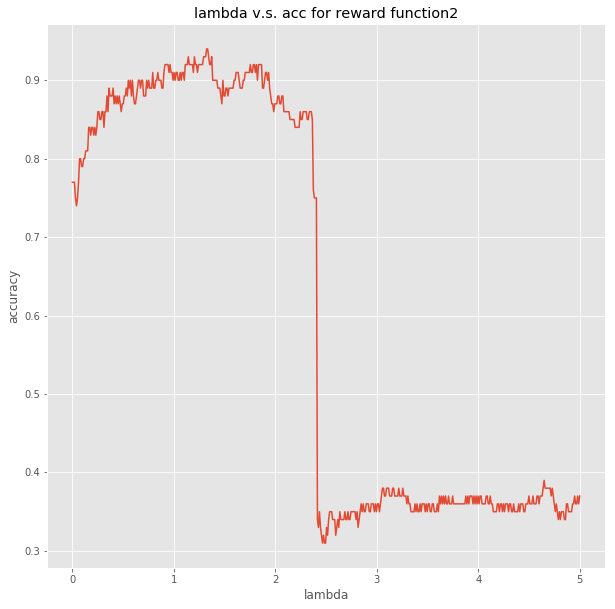

In [28]:
with open (cwd + '\\lambda.pk', 'rb') as f:
    lamb = pickle.load(f)
with open (cwd + '\\acc_1.pk', 'rb') as f:
    acc = pickle.load(f)
#print(acc)
idx = np.argmax(acc)
best_lamb = lamb[idx]
print((best_lamb, acc[idx]))
util.plot_curve(lamb, acc, 'lambda v.s. acc for reward function2')

10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434


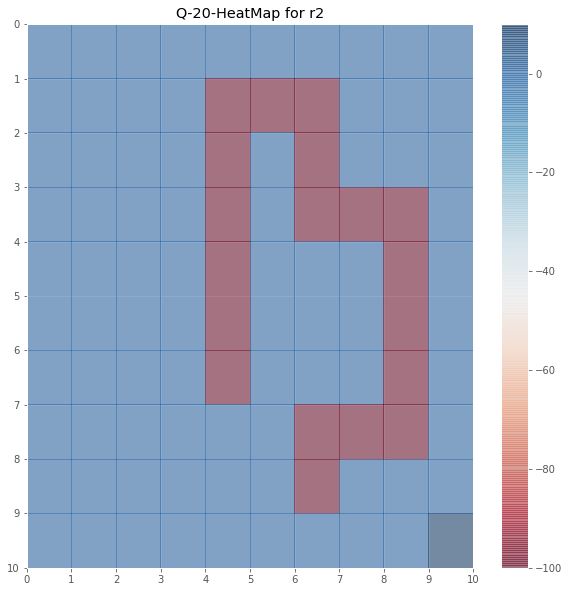

In [22]:
r_1, r_2 = util.initial_reward_map()
rfunc = r_2
mdp_process = util.return_new_mdp(rfunc)
util.plot_heat_map(rfunc, "Q-20-HeatMap for r2")

10
delta = 15.307605332249963
20
delta = 0.5852519777900369
30
delta = 0.011449736401203836


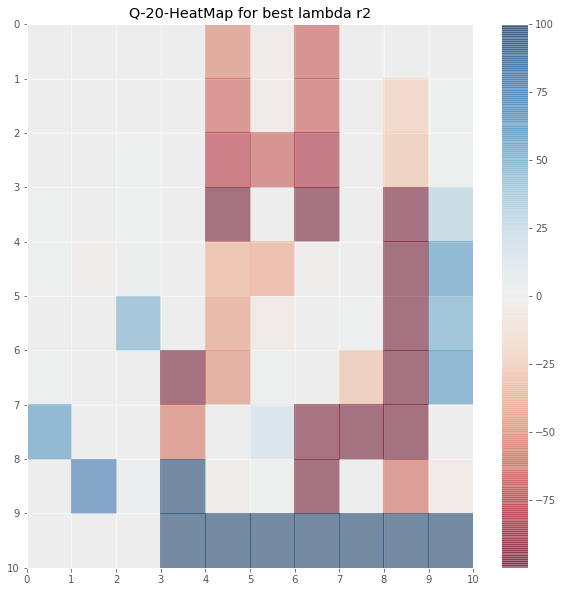

In [23]:
M = util.construct_matrix_constant(mdp_process)
c, D, b = util.get_c_D_b(best_lamb, M, rfunc)
calculated_reward = util.get_reward(c, D, b)
new_reward_map = util.create_reward_map(calculated_reward)
new_mdp2 = util.return_new_mdp(new_reward_map)
#print (new_reward_map)
util.plot_heat_map(new_reward_map, "Q-20-HeatMap for best lambda r2")

## Question 19

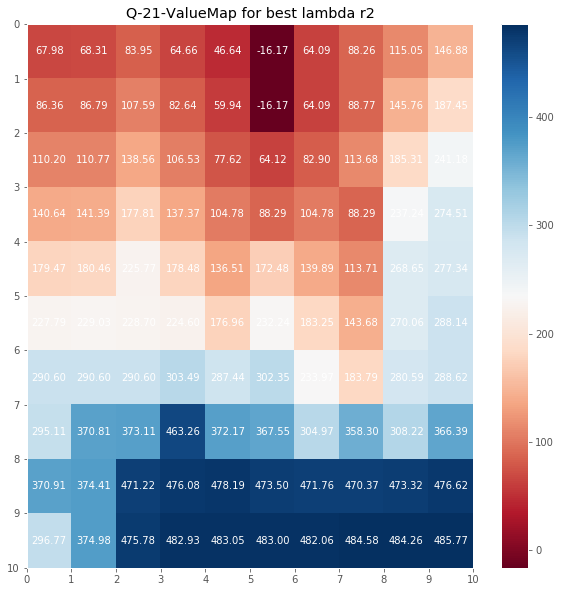

In [24]:
new_mdp2.plot_value("Q-21-ValueMap for best lambda r2", text_reveal=True, decimal = 2)

## Question 20

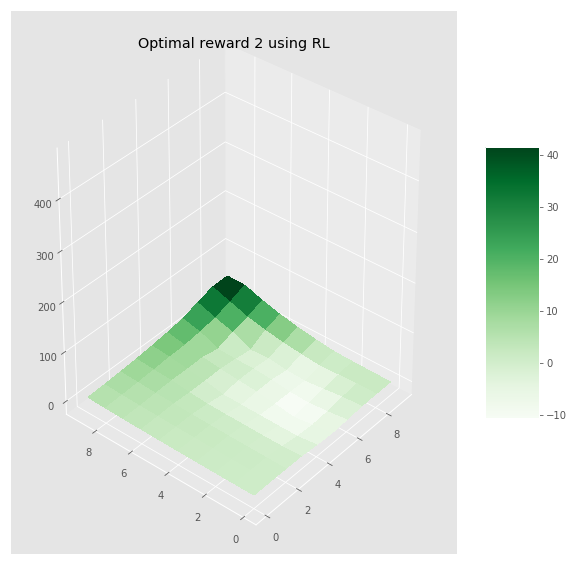

In [25]:
zlim2 = [0,0]
zlim2[0] = np.min([np.min(mdp_process2.V),np.min(new_mdp2.V)])
zlim2[1] = np.max([np.max(mdp_process2.V),np.max(new_mdp2.V)])
util.plot_mesh(mdp_process2.V,"Optimal reward 2 using RL",zlim2)

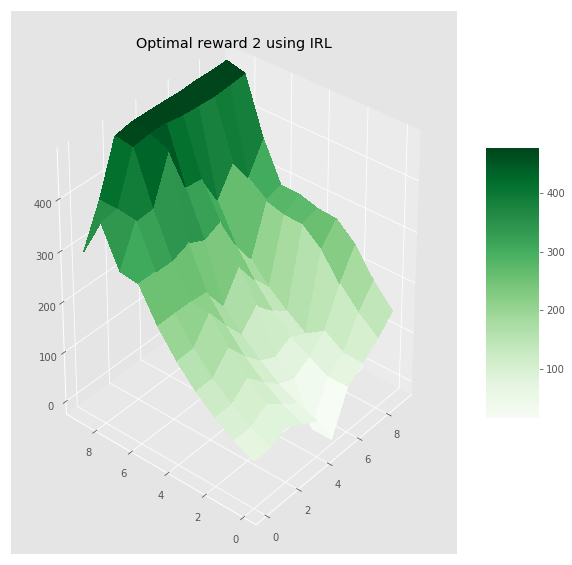

In [26]:
util.plot_mesh(new_mdp2.V,"Optimal reward 2 using IRL",zlim2)

## Question 21

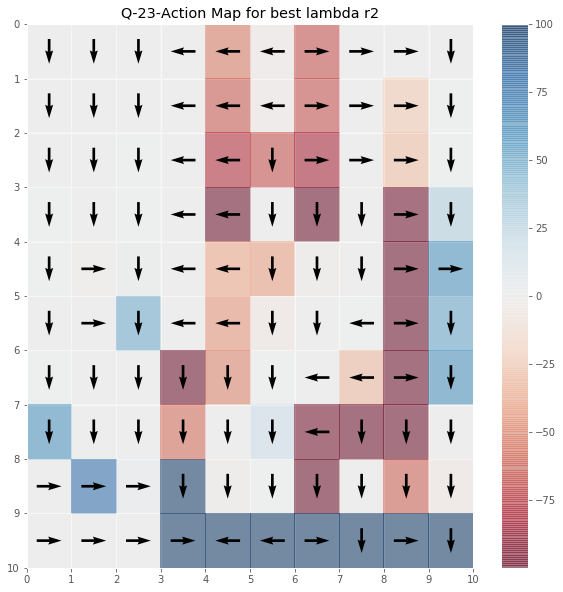

In [27]:
new_mdp2.plot_action("Q-23-Action Map for best lambda r2")